In [49]:
import numpy as np
import sep
import astropy
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [50]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

In [51]:
from numpy import array as arr

#When opening the file, I had to use newbyteorder to return the data so that the matplolib functions could process it
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = np.asarray(data, dtype=np.float32)

data = np.asarray(data, dtype=np.float32)
if not data.dtype.isnative:
    data = data.astype(data.dtype.newbyteorder("="))

print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


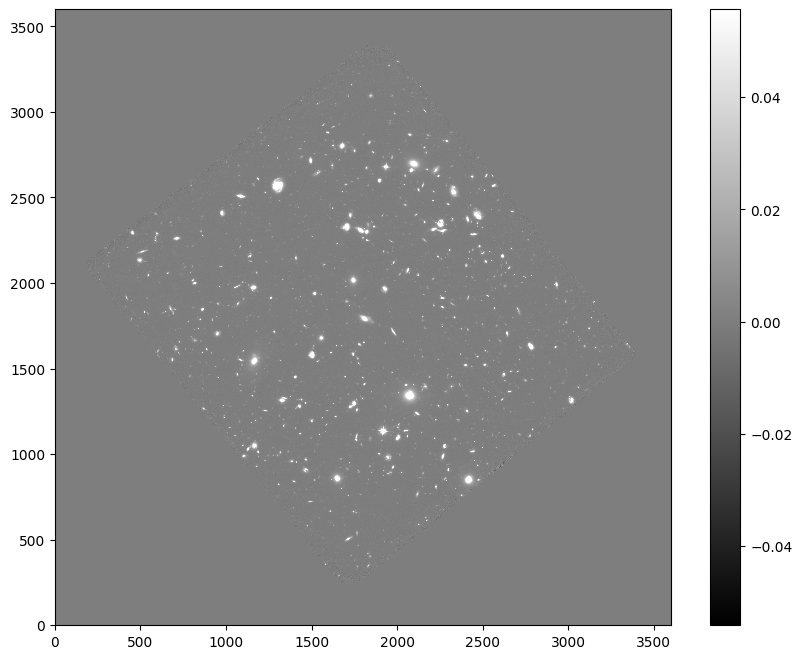

In [52]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('astr19final_5.png')

In [53]:
bkg = sep.Background(data)

In [54]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [55]:
bkg_image = bkg.back()

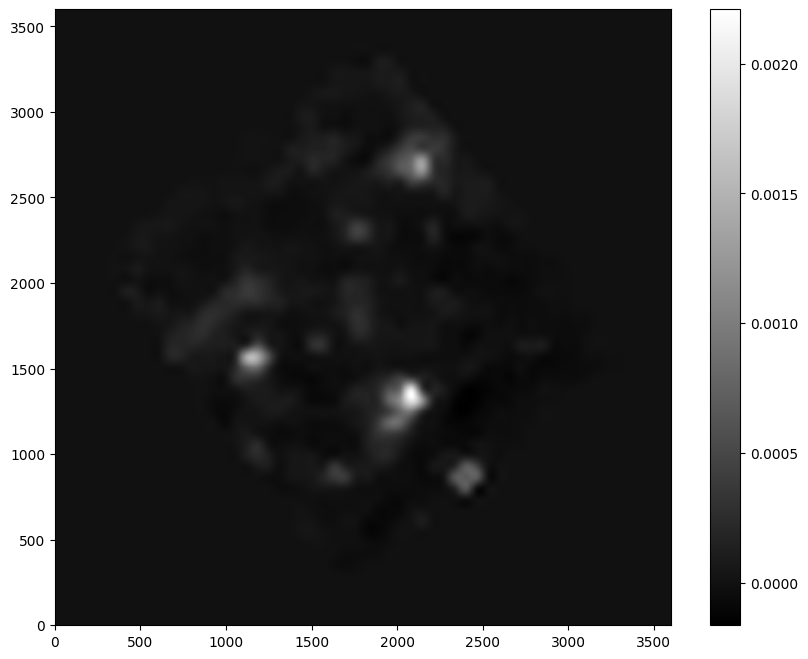

In [56]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('astr19final_6.png')

In [57]:
bkg_rms = bkg.rms()

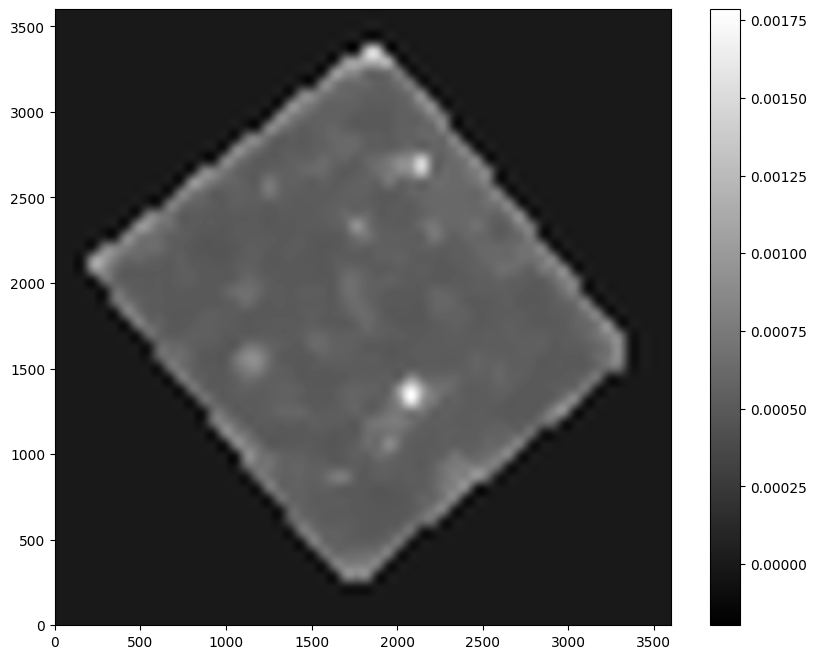

In [58]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('astr19final_7.png')

In [59]:
data_sub = data - bkg

In [60]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [61]:
len(objects)

8642

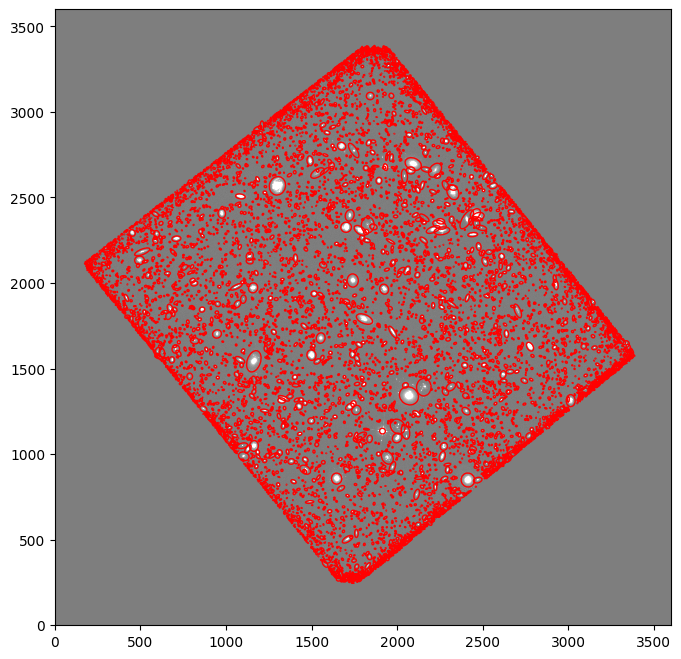

In [62]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('astr19final_8.png')

In [63]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [64]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [65]:
min_above_zero = min([i for i in flux if i > 0])
flux_lim = np.array([i for i in flux if i >= min_above_zero])
print(np.min(flux_lim), np.max(flux_lim))

4.384311119792132e-05 807.2972835731507


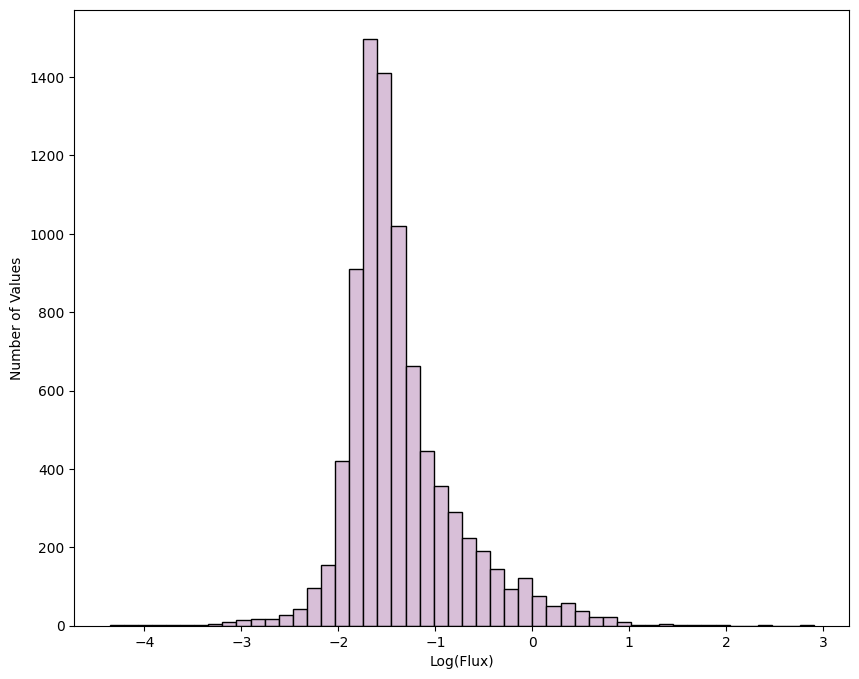

In [86]:
plt.hist(np.log10(flux_lim), bins=50, edgecolor='black', color='thistle')
plt.xlabel('Log(Flux)')
plt.ylabel('Number of Values')

plt.savefig('astr19final_hist.png')

In [81]:
print(f'The mean is {np.mean(flux)}.')
print(f'The median is {np.median(flux)}.')
print(f'The standard deviation is {np.std(flux)}.')

The mean is 0.3617744944351508.
The median is 0.030956558069156016.
The standard deviation is 9.242459957717314.


In [68]:
print(np.mean(flux) - np.min(flux))
print(np.max(flux) - np.mean(flux))

1.4231399222808139
806.9355090787155


In [69]:
outlier_index = np.argmax(flux)
outlier_x = objects['x'][outlier_index]
outlier_y = objects['y'][outlier_index]
print(outlier_x, outlier_y)

1914.2549094883857 1134.3164850742164


In [82]:
print(f'The largest outlier has a flux of {flux[outlier_index]} and is located at x={outlier_x}, y={outlier_y}.')
print(f'This point is {(flux[outlier_index] - np.mean(flux)) / np.std(flux)} standard deviations away from the mean.')

The largest outlier has a flux of 807.2972835731507 and is located at x=1914.2549094883857, y=1134.3164850742164.
This point is 87.30743901194147 standard deviations away from the mean.


In [87]:
f105w = data_sub

#Open the f125w and f160w files in the same way as the f105w file
f125w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f125w = np.asarray(data, dtype=np.float32)

f125w = np.asarray(f125w, dtype=np.float32)
if not data.dtype.isnative:
    f125w = data.astype(data.dtype.newbyteorder("="))

f160w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
f160w = np.asarray(data, dtype=np.float32)

f160w = np.asarray(f160w, dtype=np.float32)
if not data.dtype.isnative:
    f160w = data.astype(data.dtype.newbyteorder("="))
    
print(f105w.shape)
print(f125w.shape)
print(f160w.shape)

(3600, 3600)
(3600, 3600)
(3600, 3600)


In [73]:
f105w -= sep.Background(f105w)
f125w -= sep.Background(f125w)
f160w -= sep.Background(f160w)

In [74]:
def rescale_data(data, dmin=0.01, dmax=10.0):
    datac = np.clip(data, dmin, dmax)
    return (np.log10(datac)-np.log10(dmin))/(np.log10(dmax)-np.log10(dmin))

In [75]:
f105w = rescale_data(f105w)
f125w = rescale_data(f125w)
f160w = rescale_data(f160w)

In [76]:
rgb = np.stack([f160w, f125w, f105w], axis=-1)
print(rgb.shape)

(3600, 3600, 3)


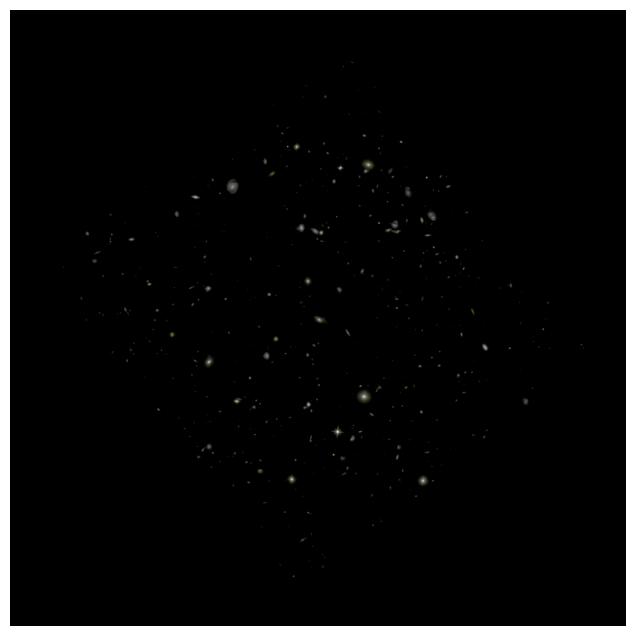

In [79]:
xsize = rgb.shape[1]
ysize = rgb.shape[0]

plt.axis('off')
plt.imshow(rgb, origin='lower')
plt.savefig('astr19final_9.png')